# Bibliometric network analysis & topic modelling

Bibliometric data from academic databases can be used to find relationships between metadata (authors, titles, citations etc.) and discover dominant topics. In this kernel, we'll use the Metaknowledge package and an information science and bibliometrics dataset from Web of Science/scopus to perform network analysis. 

From: https://arxiv.org/ftp/arxiv/papers/2304/2304.14516.pdf

Exploratory Data Analysis (EDA) capabilities encompass the tools’ 
capacity for preliminary data analysis, pattern and trend identification, and data visualization, empowering
researchers to uncover insights and formulate hypotheses. Network Analysis capabilities indicate the tools’
proficiency in examining and visualizing intricate relationships among entities such as authors, citations,
and keywords, thereby aiding researchers in deciphering data structure and dynamics. Artificial Intelligence
capabilities utilize Deep Learning techniques, like Topic Modeling, Embedding vectors, Text
Summarization, and General NLP tasks, to augment the tools’ effectiveness.

The most common features these tools share include Citation Analysis, Collaboration Analysis,
and World Collaboration Analysis, with many tools supporting Similarity Analysis and Topic Modeling.
Both pyBibX and Scientopy offer a wide range of features.

Three of the most commonly used scientific databases are WoS, Scopus, and PubMed. While these
databases share similarities in their coverage of scientific literature, they also have unique features that set
them apart. Researchers working in a specific field, such as medicine, may find PubMed the most relevant,
as it covers biomedical literature in-depth. On the other hand, researchers working in interdisciplinary fields
may find WoS or Scopus more valuable, as they cover a broad range of subjects.

I'll try and answer the following questions:

    (i) How has the research domain evolved over the last decade? 
    (ii) what are the major topics and trends within the data? 
    (iii) how is research measuring the impact of policy being conducted? 
    (iv) What are the research focus areas for California policies related to freight transportation? 
    (v) What are the programs and policies that regulate the trucking industry?

Other sources: 

https://www.kaggle.com/code/kruttika17/bibliometric-network-analysis-topic-modelling

https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0


# Libraries

In [1]:
#Requiered libraries
import numpy as np
import pandas as pd
import textwrap
from pyBibX.base import pbx_probe
from prettytable import PrettyTable

# Loading data

In [2]:
#Loading data
# Read data into papers
file_name = 'C:/Users/cata1/OneDrive - University of California, Davis/GEO200E_ResearchDesign/LitReview/scopus.bib'
database  = 'scopus'
bibfile = pbx_probe(file_bib = file_name, db = database)



A Total of 3184 Documents were Found ( 3319 Documents and 135 Duplicates )

Article = 2445
Article in Press = 34
Article; Book Chapter = 18
Book = 102
Book chapter = 66
Conference paper = 42
Editorial = 3
Editorial Material = 6
Editorial Material; Book Chapter = 1
Editorial Material; Early Access = 1
Erratum = 1
Note = 3
Proceedings Paper = 168
Review = 286
Review; Book Chapter = 2
Review; Early Access = 2
Short survey = 4


# Exploratory Data Analysis

In this section, we will perform EDA on the merged dataset. This essential step in data analysis helps us
understand the data’s underlying structure, patterns, and relationships. Also, this step provides a
comprehensive overview of the merged dataset and enables us to identify key features and trends that may
inform further analysis.

## 1. Statistics related to the collection of documents

In [3]:
# Generate EDA (Exploratory Data Analysis) Report
report = bibfile.eda_bib()

# Check report
report


Main Information    Results
0                                Timespan  1992-2024
1               Total Number of Countries         87
2            Total Number of Institutions       2266
3                 Total Number of Sources        630
4              Total Number of References          0
5               Total Number of Languages          7
6                   --chinese (# of docs)         18
7                   --english (# of docs)       3155
8                    --german (# of docs)          1
9                    --korean (# of docs)          3
10               --portuguese (# of docs)          3
11                  --russian (# of docs)          1
12                  --spanish (# of docs)          3
13                                   -//-       -//-
14              Total Number of Documents       3184
15                              --Article       2445
16                     --Article in Press         34
17                --Article; Book Chapter         18
18                                 --Book        102
19                         --Book chapter         66
20                     --Conference paper         42
21                            --Editorial          3
22                   --Editorial Material          6
23     --Editorial Material; Book Chapter          1
24     --Editorial Material; Early Access          1
25                              --Erratum          1
26                                 --Note          3
27                    --Proceedings Paper        168
28                               --Review        286
29                 --Review; Book Chapter          2
30                 --Review; Early Access          2
31                         --Short survey          4
32           Average Documents per Author       1.19
33      Average Documents per Institution       5.59
34           Average Documents per Source       2.43
35             Average Documents per Year     109.79
36                                   -//-       -//-
37                Total Number of Authors      10362
38       Total Number of Authors Keywords       4180
39  Total Number of Authors Keywords Plus      10240
40        Total Single-Authored Documents        309
41         Total Multi-Authored Documents       2875
42            Average Collaboration Index       3.88
43                            Max H-Index          8
44                                   -//-       -//-
45              Total Number of Citations      68618
46           Average Citations per Author       6.62
47      Average Citations per Institution      30.28
48         Average Citations per Document      21.55
49           Average Citations per Source      79.51
50                                   -//-       -//-

In [4]:
# Check Docs IDs
data_ID = pd.DataFrame(bibfile.table_id_doc)
display(data_ID.iloc[:15])
data_ID.to_excel('C:/Users/cata1/OneDrive - University of California, Davis/GEO200E_ResearchDesign/LitReview/data_ID.xlsx')

ID                                           Document
0    0  Kannaiyan, Kumaran and Lekshmi, G.S. and Ramak...
1    1  Liu, Yiwen and Rosado, Leonardo and Wu, Alexan...
2    2  Boa Morte, Icaro B. and Araújo, Ofélia de Quei...
3    3  Alarcón, Frank E. and Cawley, Alejandro Mac an...
4    4  Sá, José Carlos and Carvalho, Afonso and Fonse...
5    5  Kortazar, Andoni and Bueno, Gorka and Hoyos, D...
6    6  Zhou, Xinchen and Xu, Xiang and Huang, Jiping ...
7    7  Mo, Yuqiang and Madni, Ghulam Rasool (2023). P...
8    8  Kwilinski, Aleksy and Lyulyov, Oleksii and Pim...
9    9  Vaishnav, Parth (2023). Implications of Green ...
10  10  Farrukh, Salman and Li, Mingqiang and Kouris, ...
11  11  Alamoush, Anas S. and Dalaklis, Dimitrios and ...
12  12  Koch, Julia and Vringer, Kees and van der Werf...
13  13  Rathore, Bhawana and Kumar, Vimal and Gupta, R...
14  14  Martin, J. Lemuel and Viswanathan, S. (2023). ...

In [5]:
# Check Docs IDs per Type
data_Type = pd.DataFrame(bibfile.id_doc_types())
display(data_Type)

Document Types  \
0                            Article   
1                   Article in Press   
2              Article; Book Chapter   
3                               Book   
4                       Book chapter   
5                   Conference paper   
6                          Editorial   
7                 Editorial Material   
8   Editorial Material; Book Chapter   
9   Editorial Material; Early Access   
10                           Erratum   
11                              Note   
12                 Proceedings Paper   
13                            Review   
14              Review; Book Chapter   
15              Review; Early Access   
16                      Short survey   

                                                  IDs  
0   [0, 1, 2, 4, 5, 6, 7, 8, 10, 12, 13, 14, 16, 1...  
1   [2528, 2639, 2664, 2704, 2707, 2708, 2712, 274...  
2   [2043, 2123, 2577, 2630, 2686, 2687, 2875, 288...  
3   [104, 162, 205, 217, 241, 246, 259, 280, 281, ...  
4   [116, 214, 222, 282, 291, 297, 483, 495, 501, ...  
5   [100, 201, 202, 272, 285, 286, 287, 323, 327, ...  
6                                   [257, 1310, 1352]  
7                [1964, 2036, 2095, 2304, 2709, 2915]  
8                                              [2267]  
9                                              [2797]  
10                                             [1392]  
11                                     [97, 549, 922]  
12  [1544, 1602, 1675, 1714, 1783, 1787, 1855, 188...  
13  [3, 9, 11, 15, 19, 24, 44, 53, 56, 64, 72, 76,...  
14                                       [1555, 2235]  
15                                       [2546, 2716]  
16                              [167, 229, 879, 1222]

In [6]:
# Check Authors IDs
data_Authors = pd.DataFrame(bibfile.table_id_aut)
display(data_Authors.iloc[:15])

ID                                  Author
0    a_0  &#x00c1;lvarez-herranz, agust&#x00ed;n
1    a_1                                a, aswin
2    a_2                       a. alattieh, sara
3    a_3                          aamaas, borgar
4    a_4                   ab rahman, mohd nizam
5    a_5                       abaker, wafa e.a.
6    a_6                        abalansa, samuel
7    a_7                         abareshi, ahmad
8    a_8                           abbasi, babak
9    a_9                     abbasi, kashif raza
10  a_10                    abbasi, muhammad ali
11  a_11                        abbassi, rouzbeh
12  a_12                  abbatt, jonathan p. d.
13  a_13                   abd majid, muhd zaimi
14  a_14                  abd rashid, ahmad faiz

In [7]:
# Check Sources IDs
data_Sources = pd.DataFrame(bibfile.table_id_jou)
display(data_Sources.iloc[:15])

ID                                Source
0    j_0                       j. clean. prod.
1    j_1                        sustainability
2    j_2                              energies
3    j_3            environ. sci. pollut. res.
4    j_4      renewable sustainable energy rev
5    j_5  transp. res. part d transp. environ.
6    j_6                         energy policy
7    j_7                                energy
8    j_8                   sci. total environ.
9    j_9                         j. ind. ecol.
10  j_10                environ. sci. technol.
11  j_11                       int j prod econ
12  j_12                     environ.res.lett.
13  j_13                sustain. prod. consum.
14  j_14   int. j. environ. res. public health

In [8]:
# Check Institutions IDs
data_Uni = pd.DataFrame(bibfile.table_id_uni)
display(data_Uni)

ID                                        Institution
0        i_0           school of natural and built environments
1        i_1                            college of liberal arts
2        i_2                                    yangpu hospital
3        i_3                 university of naples ‘federico ii’
4        i_4  state environmental protection key laboratory ...
...      ...                                                ...
2261  i_2261                      chair of industrial logistics
2262  i_2262     shipbuilding institute of polytechnic surabaya
2263  i_2263                                            dunedin
2264  i_2264                          zaragoza logistics center
2265  i_2265                             university of jendouba

[2266 rows x 2 columns]

In [9]:
# Check Countries IDs
data_Countries = pd.DataFrame(bibfile.table_id_ctr)
display(data_Countries)

ID         Country
0    c_0         Finland
1    c_1         Austria
2    c_2       Sri Lanka
3    c_3        Malaysia
4    c_4           Italy
..   ...             ...
82  c_82        Viet Nam
83  c_83  United Kingdom
84  c_84          Poland
85  c_85            Oman
86  c_86          Turkey

[87 rows x 2 columns]

In [10]:
# Check Keywords IDs
data_Key = pd.DataFrame(bibfile.table_id_kwa)
display(data_Key)

ID                                                KWA
0        k_0                                   carbon footprint
1        k_1                                     sustainability
2        k_2                              life cycle assessment
3        k_3                                     climate change
4        k_4                                    carbon emission
...      ...                                                ...
4175  k_4175  ______________________________________________...
4176  k_4176                                               2030
4177  k_4177                              100% renewable energy
4178  k_4178                             (re)territorialization
4179  k_4179                                #-constraint method

[4180 rows x 2 columns]

## 2. WordCloud and n-grams

One way to gain further insights about the documents would be to conduct a text
analysis using wordclouds and n-grams. By generating wordclouds and n-grams (n is a positive integer
greater than 1) from the abstracts of the documents, it may be possible to identify common themes, topics,
and terminology used by the authors. The 3-gram analysis provided insights into the specific concepts and techniques
discussed in the documents.

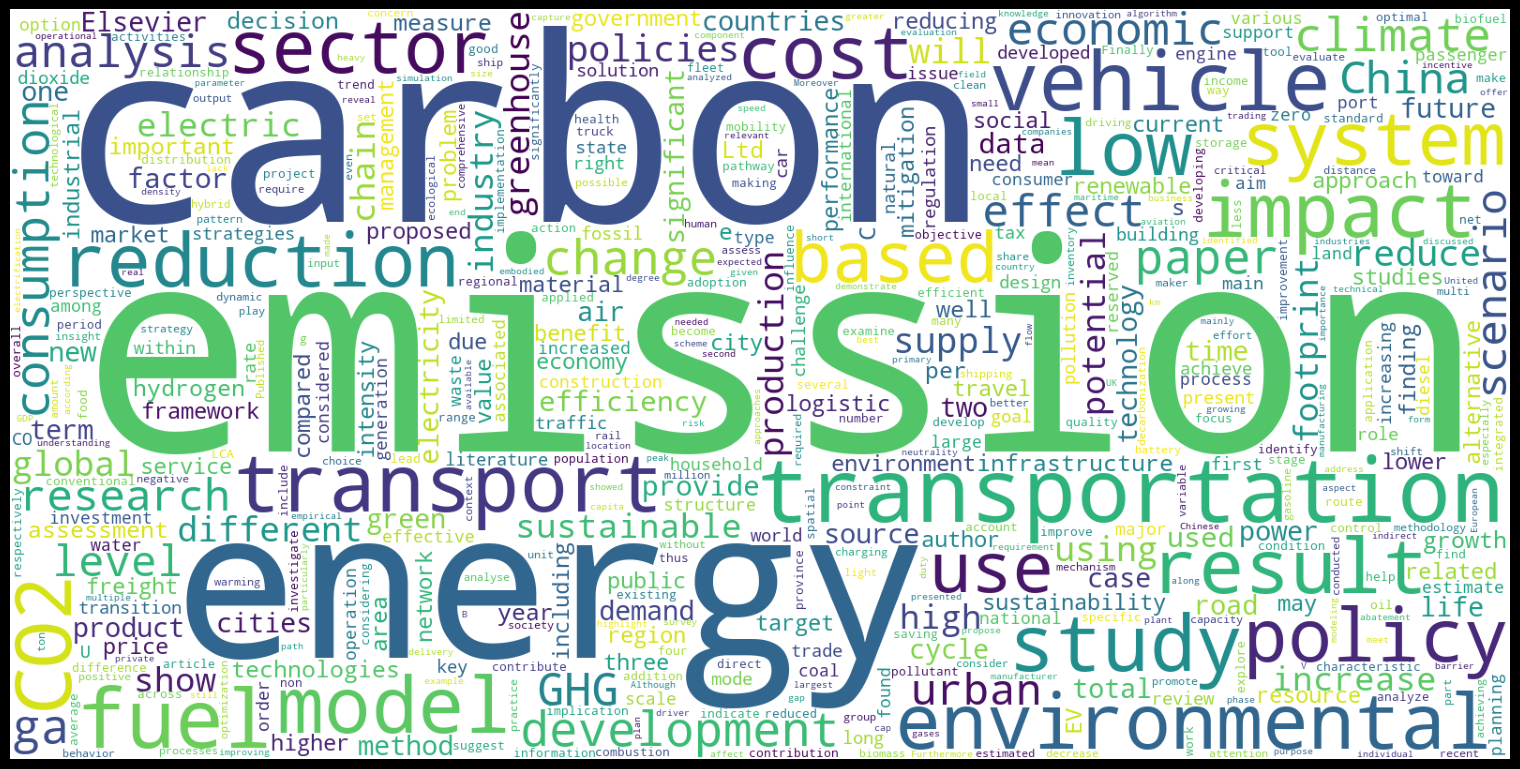

In [11]:
# WordCloud
bibfile.word_cloud_plot(entry = 'abs', size_x= 15, size_y= 10, wordsn=500)

In [12]:
# Check Table
table = PrettyTable()
data_wd = bibfile.ask_gpt_wd
table.field_names = ['Wprd', 'Importance']
for key, value in data_wd.items():
    table.add_row([key, round(value,4)])
print(table)

+-----------------+------------+
|       Wprd      | Importance |
+-----------------+------------+
|     emission    |    1.0     |
|      carbon     |   0.7702   |
|      energy     |   0.4815   |
|  transportation |   0.3225   |
|     vehicle     |   0.2655   |
|       fuel      |   0.2631   |
|    transport    |   0.2508   |
|       CO2       |   0.2392   |
|      model      |   0.2368   |
|      study      |   0.2359   |
|  environmental  |   0.2294   |
|      impact     |   0.2215   |
|       low       |   0.2199   |
|      result     |   0.2179   |
|    reduction    |   0.2059   |
|      sector     |   0.2058   |
|      policy     |   0.2045   |
|       cost      |   0.2038   |
|      system     |   0.2018   |
|      based      |   0.1745   |
|       use       |   0.1728   |
|   development   |   0.1617   |
|   consumption   |   0.1598   |
|      paper      |   0.1585   |
|        ga       |   0.1572   |
|      change     |   0.1553   |
|     climate     |   0.1518   |
|       GH

In [13]:
# N-Grams
bibfile.get_top_ngrams(view = 'notebook', entry = 'kwp', ngrams = 3, stop_words = [], rmv_custom_words = [], wordsn = 15)

In [14]:
# Check table 
data_ng = bibfile.ask_gpt_ng
display(data_ng)

Word  Freq
0            life cycle assessment   176
1              life cycle analysis   129
2            carbon dioxide carbon   121
3         gas emissions greenhouse   109
4       emissions greenhouse gases   106
5         greenhouse gas emissions    98
6          supply chain management    85
7            carbon carbon dioxide    83
8          dioxide carbon emission    78
9            input output analysis    74
10            cycle assessment lca    71
11         emission control energy    62
12  emission control environmental    61
13           cost benefit analysis    58
14               roads and streets    57

## 3. Clusterization based on main topics

the next step in EDA is to
transform the abstracts into numerical representations. The abstracts of the documents can be
transformed into a Term Frequency-Inverse Document Frequency (TF-IDF) matrix or Embeddings. Once
the documents are represented this way, dimension reduction techniques such as UMAP or TSVD can be
applied to reduce the dimensionality to two dimensions for visualization purposes. Document clustering
based on dimension reduction techniques is widely used to analyze texts; by reducing the dimensionality
of the data, these techniques can reveal the underlying structure of the text data, making it easier to explore
and interpret (RAMKUMAR & POORNA, 2016). The final step is to group the documents into clusters
using the k-means algorithm (McQUEEN, 1967) to group the documents in k natural groups based on a
distance measure and plot the results, with each cluster highlighted by a different color. By visualizing the
clusters, researchers can quickly identify patterns and relationships within the data and use this information
to make more informed decisions about the next steps in their analysis and help researchers to uncover new
insights and research directions.

In [15]:
# Documents Projection based on Words. (An interactive plot). It returns the Projection (each document coordinate) and the Labels (each document cluster)
# Arguments: view              = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            corpus_type       = 'abs', 'title', 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            custom_label      = A list of custom labels for each document. The user can define each document cluster;
#            custom_projection = A list of custom coordinates for each document. The user can define each document coordinate;
#            n_components      = Number of Dimensions;
#            n_clusters        = Number of Clusters;
#            tf_idf            = True or False (True -> The Cluster Algorithm will use the DTM to calculate each document Label. False -> The Cluster Algorithm will use the Coordinates to calculate each document Label)
#            embeddings        = True or False (True -> The Cluster Algorithm will use the Word Embeddings to calculate each document Label. False -> The Cluster Algorithm will use the Coordinates to calculate each document Label)
#            method            = 'tsvd' or 'umap' ('tsvd' -> Truncated SVD projection method is used. 'umap' -> UMAP projection method is used)
projection, labels = bibfile.docs_projection(view = 'notebook',
                                              corpus_type = 'abs',
                                              stop_words = ['en'],
                                              rmv_custom_words = [],
                                              custom_label = [],
                                              custom_projection = [],
                                              n_components = 2,
                                              n_clusters = 44,
                                              tf_idf = False,
                                              embeddings = False,
                                              method = 'umap')

In [16]:
# Check table
data_pr = pd.DataFrame(np.hstack([projection, labels.reshape(-1,1)]))
display(data_pr)

0         1     2
0     11.673389  0.785231  26.0
1      6.576757  6.141505  27.0
2      6.580898  3.352661  30.0
3      7.262329  6.553985  27.0
4      8.434430  6.022044  33.0
...         ...       ...   ...
3179   6.498617  7.062427  21.0
3180  10.090213  1.789687  29.0
3181  11.133010  2.346536   1.0
3182  10.361876  4.436683   4.0
3183   8.667108  3.233919  22.0

[3184 rows x 3 columns]

Identifying the themes or topics can be further investigated using various techniques. One way is to create
an evolution plot of the keywords used in the abstracts over the years, and this can give insight into how
the topic has evolved and what subtopics are emerging. By looking at how the frequency and usage of
certain words change over time, researchers can gain insights into the shifting focus of the field and the
emergence of new topics

In [29]:
bibfile.plot_evolution_year(view = 'notebook',
                            stop_words = ['en'],
                            rmv_custom_words = [],
                            key = 'abs',
                            topn = 10,
                            start = 2010,
                            end = 2024)

Allied with the evolution plot, we can also use a treemap to aid our understanding of the dominant central
theme of all 184 documents. By applying this technique to the entire set of keywords plus across all 184
documents, we can quickly identify the most frequently occurring keywords, which may indicate significant
themes and topics. Figure 04 shows the results for the top 15 keywords plus

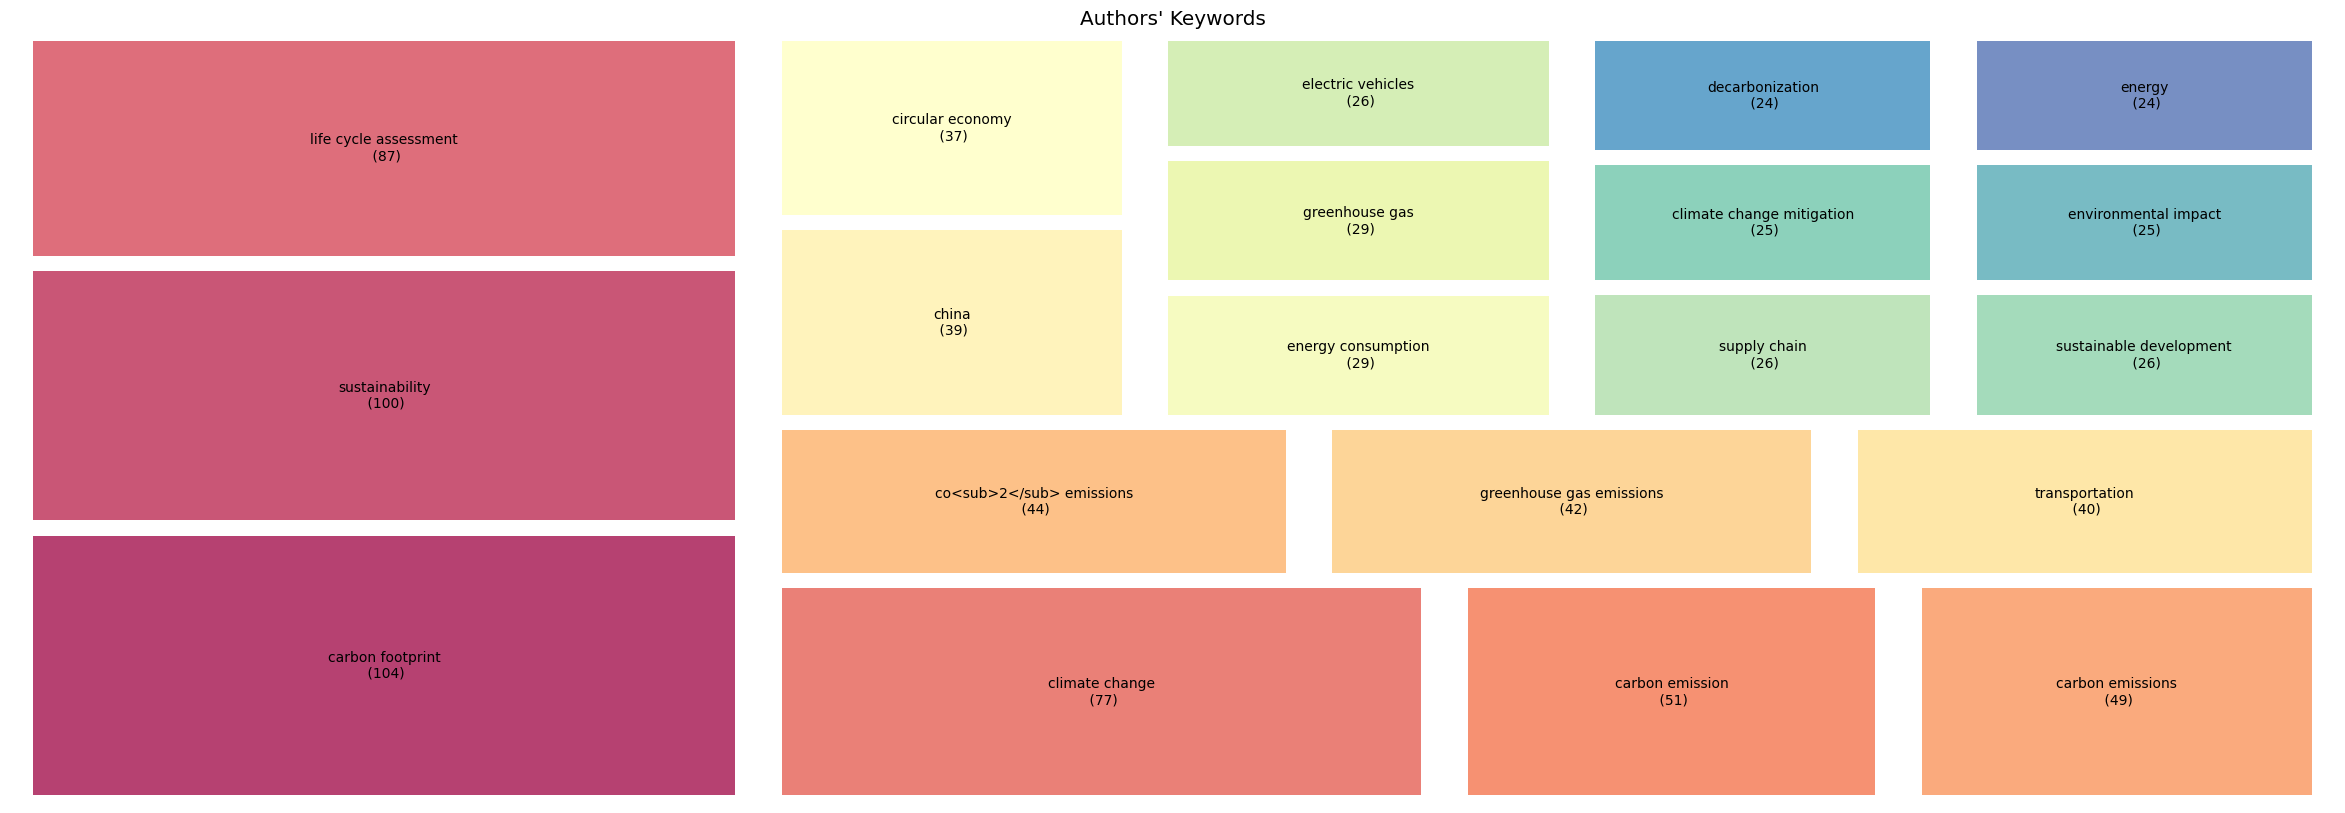

In [18]:
# Tree Map
# Arguments: entry = 'kwp', 'kwa', 'aut', 'jou', 'ctr', or 'inst';
#            topn  = Total number entities
bibfile.tree_map(entry = 'kwa', topn = 20, size_x = 30, size_y = 10)

In [19]:
# view table
data_ep = bibfile.ask_gpt_ep
print(textwrap.fill(data_ep, 150))

 2010: emissions (39), carbon (36), low (32), transportation (31), energy (28), policy (24), elsevier (24), fuel (23), gas (23), greenhouse (22) 2011:
carbon (47), emissions (45), transportation (35), energy (34), low (28), gas (28), results (27), study (26), policy (26), climate (25) 2012: emissions
(66), carbon (59), energy (44), policy (44), transportation (43), low (37), greenhouse (37), gas (34), emission (33), environmental (32) 2013: carbon
(81), emissions (75), low (64), transportation (59), energy (49), paper (47), policy (45), emission (41), policies (38), study (37) 2014: emissions
(73), carbon (71), transportation (62), policy (48), energy (45), low (44), paper (43), results (37), elsevier (34), rights (33) 2015: carbon (98),
emissions (98), energy (71), transportation (66), paper (60), low (58), results (58), emission (56), study (56), environmental (53) 2016: emissions
(89), carbon (84), transportation (71), energy (70), policy (65), low (65), elsevier (63), results (57),

## 4. Network Analysis

Now that the EDA is complete, we can move on to Network Analysis, which focuses on the relationships
between scientific publications, authors, and journals. In Network Analysis, publications, authors, and
journals are represented as nodes, and their relationships are represented as edges. Network analysis can
identify collaboration patterns between authors or institutions, map ideas within a field, or identify critical
publications or journals within a particular research area (DING, 2011).

In [20]:
# Sankey Diagram (An interactive plot)
# Arguments: view  = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            entry = a list of any length of the following keys -> 'aut', 'cout', 'inst', 'jou', 'kwa', 'kwp', 'lan';
#            topn  = Total number entities
bibfile.sankey_diagram(view = 'notebook', entry = ['aut', 'cout', 'inst'], topn = 30)

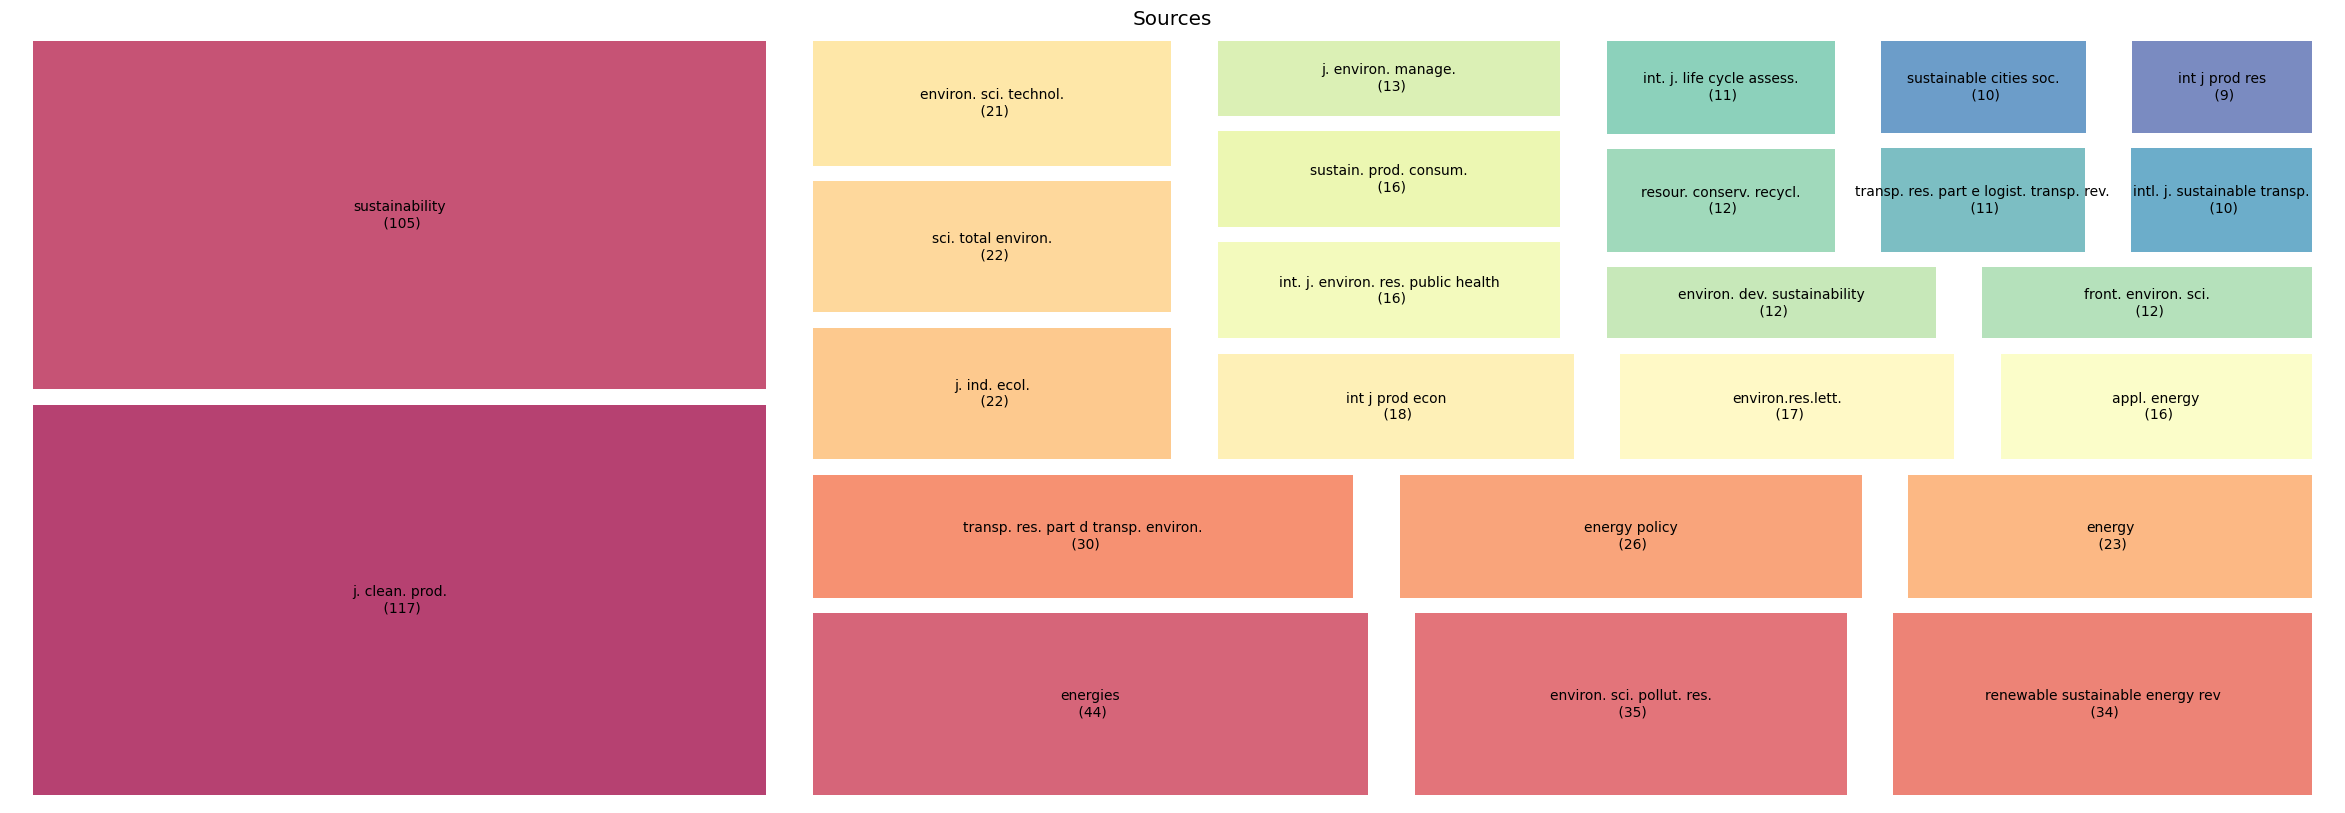

In [21]:
# Tree Map
# Arguments: entry = 'kwp', 'kwa', 'aut', 'jou', 'ctr', or 'inst';
#            topn  = Total number entities
bibfile.tree_map(entry = 'jou', topn = 25, size_x = 30, size_y = 10)

In [22]:
# Authors productivity plot. It informs for each year documents (IDs) published for each author
bibfile.authors_productivity(view = 'notebook', topn = 20)

In [23]:
# View Table
data_ap = bibfile.ask_gpt_ap
display(data_ap)

2008  2009  2010  2011  2012  2013  2014  2015  2016  \
yeh, sonia               0.0   0.0   2.0   0.0   1.0   0.0   1.0   2.0   2.0   
yang, christopher        1.0   1.0   1.0   0.0   2.0   3.0   0.0   2.0   1.0   
horvath, arpad           0.0   0.0   1.0   0.0   1.0   0.0   2.0   2.0   2.0   
tatari, omer             0.0   0.0   0.0   0.0   0.0   0.0   1.0   2.0   4.0   
li, yan                  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
kammen, daniel m.        0.0   1.0   0.0   2.0   0.0   1.0   1.0   2.0   2.0   
hertwich, edgar g.       0.0   0.0   0.0   1.0   0.0   2.0   1.0   1.0   0.0   
axsen, jonn              0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
yu, yang                 0.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0   1.0   
filimonau, viachaslau    0.0   0.0   0.0   2.0   0.0   1.0   1.0   0.0   1.0   
wallington, timothy j.   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
sperling, daniel         0.0   0.0   3.0   0.0   0.0   0.0   0.0   0.0   1.0   
sharif, arshian          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
kucukvar, murat          0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   
klemeš, jiří jaromír     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
jaramillo, paulina       0.0   0.0   0.0   2.0   2.0   0.0   0.0   2.0   0.0   
du, qiang                0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
creutzig, felix          0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   2.0   
brand, christian         0.0   0.0   0.0   0.0   1.0   1.0   0.0   0.0   0.0   
wang, zhaohua            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

                        2017  2018  2019  2020  2021  2022  2023  
yeh, sonia               1.0   1.0   0.0   0.0   1.0   0.0   0.0  
yang, christopher        0.0   0.0   0.0   0.0   0.0   0.0   0.0  
horvath, arpad           0.0   0.0   1.0   0.0   1.0   0.0   1.0  
tatari, omer             1.0   1.0   0.0   0.0   0.0   1.0   0.0  
li, yan                  1.0   1.0   3.0   2.0   1.0   1.0   1.0  
kammen, daniel m.        0.0   0.0   0.0   1.0   0.0   0.0   0.0  
hertwich, edgar g.       2.0   2.0   0.0   1.0   0.0   0.0   0.0  
axsen, jonn              1.0   1.0   1.0   5.0   0.0   1.0   1.0  
yu, yang                 0.0   0.0   0.0   0.0   1.0   3.0   2.0  
filimonau, viachaslau    0.0   0.0   0.0   1.0   2.0   0.0   1.0  
wallington, timothy j.   1.0   0.0   0.0   0.0   3.0   3.0   0.0  
sperling, daniel         0.0   2.0   0.0   0.0   1.0   1.0   0.0  
sharif, arshian          0.0   0.0   0.0   2.0   2.0   0.0   4.0  
kucukvar, murat          0.0   0.0   1.0   0.0   3.0   1.0   0.0  
klemeš, jiří jaromír     0.0   1.0   1.0   0.0   1.0   0.0   5.0  
jaramillo, paulina       0.0   1.0   0.0   0.0   0.0   1.0   0.0  
du, qiang                1.0   0.0   2.0   0.0   1.0   2.0   2.0  
creutzig, felix          0.0   0.0   0.0   1.0   1.0   2.0   1.0  
brand, christian         1.0   0.0   1.0   0.0   4.0   0.0   0.0  
wang, zhaohua            1.0   1.0   1.0   2.0   0.0   1.0   1.0

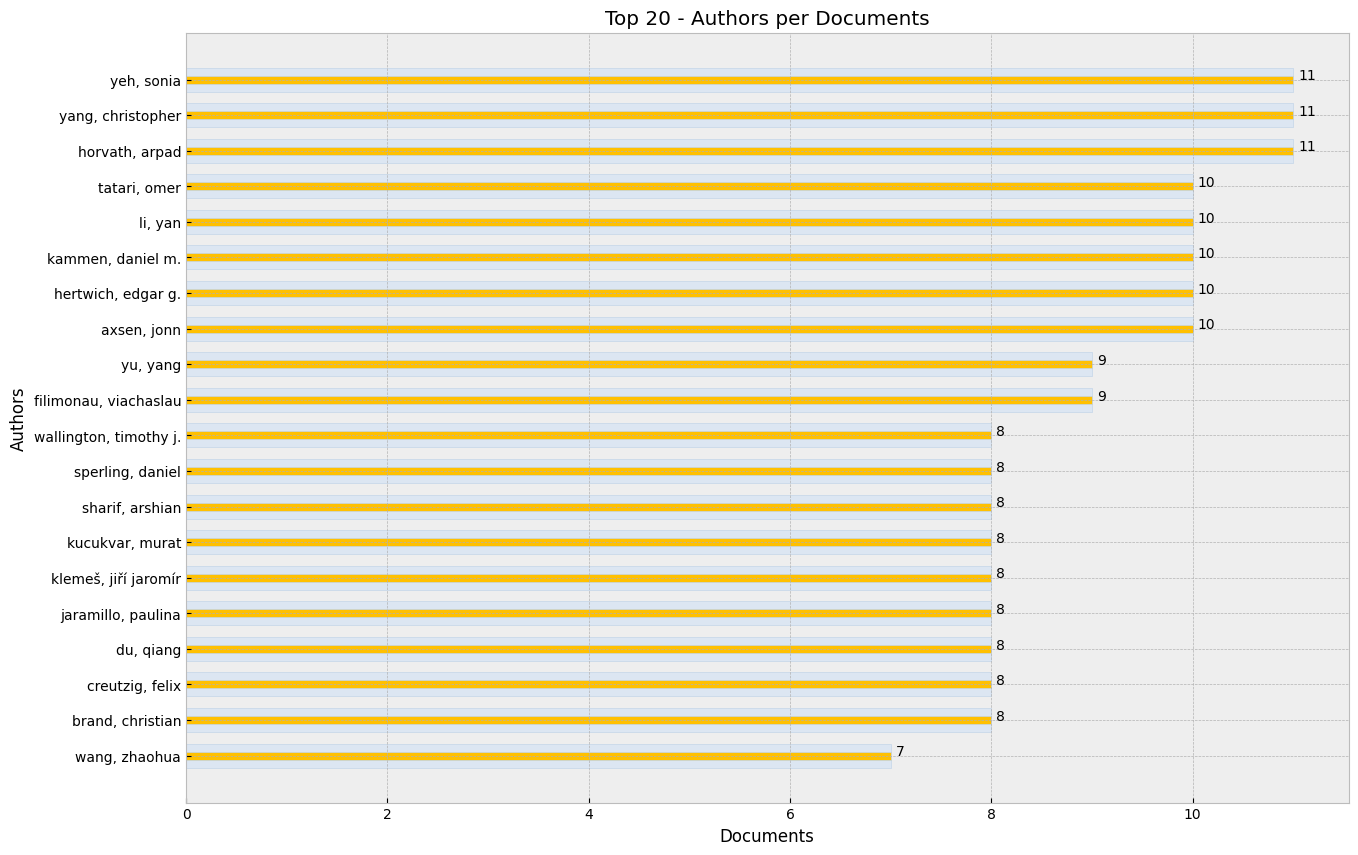

In [24]:
# Bar Plots
bibfile.plot_bars(statistic = 'apd', topn = 20, size_x = 15, size_y = 10)

In [25]:
# View Table
data_bp = bibfile.ask_gpt_bp
display(data_bp)

Documents  Authors
0               yeh, sonia       11
1        yang, christopher       11
2           horvath, arpad       11
3             tatari, omer       10
4                  li, yan       10
5        kammen, daniel m.       10
6       hertwich, edgar g.       10
7              axsen, jonn       10
8                 yu, yang        9
9    filimonau, viachaslau        9
10  wallington, timothy j.        8
11        sperling, daniel        8
12         sharif, arshian        8
13         kucukvar, murat        8
14    klemeš, jiří jaromír        8
15      jaramillo, paulina        8
16               du, qiang        8
17         creutzig, felix        8
18        brand, christian        8
19           wang, zhaohua        7

In [26]:
# Network - Collaboration Analysis Between Authors, Countries, Intitutions Or Adjacency Analysis Between Authors' Keywords or Keywords Plus. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            adj_type    = 'aut', 'cout', 'inst', 'kwa', or 'kwp'
#            min_count   = Relationship between nodes that have connected at least x times;
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            label_type  = 'id', 'name' (Only meaningfull if node_labels = True. 'id' -> The ID will be displayed; 'name' -> The name will be displayed);
#            centrality  = 'degree', 'load', 'betw', 'close', 'eigen', 'katz', 'harmonic', or None. Color nodes according to centrality criterion
#                          'degree'   = Degree Centrality
#                          'load'     = Load Centrality
#                          'betw'     = Betweenness Centrality
#                          'close'    = Closeness Centrality
#                          'eigen'    = Eigenvector Centrality
#                          'katz'     = Katz Centrality
#                          'harmonic' = Harmonic Centrality
#                           None      = The Community Algorithm, Girvan-Newman, will be used Instead of a Centrality Criterion
bibfile.network_adj(view = 'notebook', adj_type = 'kwp', min_count = 5, node_labels = True, label_type = 'id', centrality = None)

# PS: If a centrality criterion is used then the values can be obtained by the following command:  bibfile.table_centr

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\cata1\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\cata1\AppData\Local\Temp\ipykernel_27124\1219387074.py", line 17, in <module>
    bibfile.network_adj(view = 'notebook', adj_type = 'kwp', min_count = 5, node_labels = True, label_type = 'id', centrality = None)
  File "c:\Users\cata1\AppData\Local\Programs\Python\Python310\lib\site-packages\pyBibX\base\pbx.py", line 3279, in network_adj
    community        = next(generator)
  File "c:\Users\cata1\AppData\Local\Programs\Python\Python310\lib\site-packages\networkx\algorithms\community\centrality.py", line 148, in girvan_newman
    yield _without_most_central_edges(g, most_valuable_edge)
  File "c:\Users\cata1\AppData\Local\Programs\Python\Python310\lib\site-packages\networkx\algorithms\community\centrality.py", line 167, in _without_most_central_edges
    

In [ ]:
# View Table
data_adj = bibfile.ask_gpt_adj
display(data_adj)

Node 1 (Author) Node 2 (Author)  Node 1 Cluster  Node 2 Cluster
0            ID: a_0       ID: a_550             0.0             0.0
1         ID: a_4096      ID: a_5175            61.0            61.0
2         ID: a_4098      ID: a_8620             2.0             2.0
3        ID: a_10242      ID: a_8742            26.0            26.0
4         ID: a_4101      ID: a_7889            18.0            18.0
...              ...             ...             ...             ...
1200      ID: a_5967      ID: a_6042            79.0            79.0
1201     ID: a_10096      ID: a_8156            11.0            11.0
1202      ID: a_6031      ID: a_6042            79.0            79.0
1203      ID: a_1978      ID: a_2002             2.0             2.0
1204      ID: a_1985      ID: a_2032            13.0            13.0

[1205 rows x 4 columns]

In [ ]:
# Network - Highlight  Collaboration Analysis Between Authors, Countries, Intitutions Or Adjacency Analysis Between Authors' Keywords or Keywords Plus. (An interactive plot).
# Arguments: view      = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            node_ids  = A list of IDs. Only meaningfull if label_type = 'id';
#            node_name = A list of Names. Only meaningfull iflabel_type = 'name';
#            node_only = True or False (True -> Only the Node will be Highlighted, False -> Node and its Connections will be Highlighted)
bibfile.find_nodes(node_ids = [], node_name = ['jaramillo, paulina'], node_only = False)

# 5. Artificial Intelligence Analysis

After performing the EDA and Network Analysis, our next step is to use Artificial Intelligence tools to gain
deeper insights into the collection of documents. In particular, Embeddings, Topic Modeling, and Text
Summarization, both based on Deep Learning techniques, can help to uncover hidden themes and patterns
within the data. By automatically identifying and summarizing key topics and trends, these tools can
provide a more efficient and accurate way to extract meaning from large amounts of text data.

Our study combined UMAP with Embeddings to project the abstracts onto a lower-dimensional space and
visualize their relationship. The Embeddings are obtained using the Sentence-BERT Deep Learning Model
developed by Reimers and Gurevych (2019). In addition to visualizing the relationship between abstracts,
the Embeddings can be used as input to the other Deep Learning techniques. By using these Embeddings
as input, the Deep Learning models can better capture the semantic meaning and context of the text. These
representations can improve results in tasks such as identifying key topics or generating concise summaries,
demonstrating the versatility and usefulness of Embeddings in various NLP tasks.

In [ ]:
# NLP
# Arguments: corpus_type       = 'abs', 'title', 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
bibfile.create_embeddings(stop_words = ['en'], rmv_custom_words = [], corpus_type = 'abs')
emb = bibfile.embds

In [ ]:
# NLP #-1 refers to all outliers and should typically be ignored.
# Arguments: stop_words  = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                        'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                        'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                        'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            embeddings        = True or False. If True then word embeddings are used to create the topics
bibfile.topics_creation(stop_words = ['en'], rmv_custom_words = [], embeddings = False)

    Topic  Count                                         Name  \
0      -1   1121    -1_emissions_carbon_energy_transportation   
1       0    256              0_electric_vehicles_evs_vehicle   
2       1    180                  1_chain_supply_carbon_model   
3       2    140                   2_urban_cities_city_carbon   
4       3    139               3_shipping_port_maritime_ports   
5       4     79   4_buildings_building_construction_embodied   
6       5     79         5_transportation_sector_chinas_china   
7       6     70           6_freight_transport_road_logistics   
8       7     69               7_chinas_carbon_industry_china   
9       8     62    8_household_consumption_households_income   
10      9     61                9_climate_book_change_justice   
11     10     55           10_hydrogen_energy_ammonia_storage   
12     11     49             11_energy_renewable_system_power   
13     12     48  12_environmental_growth_innovation_economic   
14     13     46         

In [ ]:
# NLP
# Each document Topic
topics = bibfile.topics

In [ ]:
# NLP
# Each document Probability to belong a Topic
probs = bibfile.probs


In [ ]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics_distribution(view = 'notebook')

In [ ]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics(view = 'notebook')

In [ ]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics_projection(view = 'notebook')

In [ ]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics_heatmap(view = 'notebook')

In [ ]:
# NLP
bibfile.topics_representatives()

Topic              Docs
0    -1.0                  
1     0.0  1252; 1545; 1661
2     1.0   531; 1608; 1563
3     2.0  1928; 2058; 1793
4     3.0   394; 2359; 2338
5     4.0     55; 2423; 901
6     5.0  1638; 2006; 2729
7     6.0     376; 131; 488
8     7.0  1587; 2532; 1862
9     8.0  3017; 2628; 1267
10    9.0    1497; 848; 178
11   10.0  1979; 2679; 3057
12   11.0  2169; 2324; 1602
13   12.0   3007; 1057; 443
14   13.0    2221; 80; 2601
15   14.0  2122; 1968; 2669
16   15.0    290; 1656; 658
17   16.0  1680; 1804; 1204
18   17.0  1746; 1768; 1978
19   18.0      395; 95; 120
20   19.0  1989; 2584; 1071
21   20.0  1327; 1150; 1435
22   21.0      605; 421; 44
23   22.0  2233; 2247; 1850
24   23.0  1320; 1376; 1526
25   24.0  1077; 2297; 2458
26   25.0  1682; 3154; 2516
27   26.0   1456; 556; 1617
28   27.0  2594; 1700; 1666
29   28.0  1516; 2441; 2887
30   29.0   631; 2290; 1280
31   30.0    1439; 214; 672
32   31.0  1770; 2485; 2356
33   32.0  2544; 3131; 2398
34   33.0  2541; 2483; 1888
35   34.0    766; 915; 3082
36   35.0   1528; 534; 3169
37   36.0  2252; 1094; 1067
38   37.0     911; 226; 932
39   38.0   332; 3078; 2218
40   39.0   2317; 2927; 103
41   40.0  1640; 1637; 3122
42   41.0  1670; 2217; 1703
43   42.0   2327; 833; 1901
44   43.0     669; 559; 292

In [ ]:
# NLP
similar_topics, similarity = bibfile.topic_model.find_topics('electre', top_n = 10)
for i in range(0, len(similar_topics)):
  print('Topic: ', similar_topics[i], 'Correlation: ', round(similarity[i], 3))

Topic:  0 Correlation:  0.163
Topic:  11 Correlation:  0.158
Topic:  9 Correlation:  0.15
Topic:  32 Correlation:  0.122
Topic:  23 Correlation:  0.119
Topic:  30 Correlation:  0.118
Topic:  12 Correlation:  0.108
Topic:  -1 Correlation:  0.102
Topic:  4 Correlation:  0.101
Topic:  35 Correlation:  0.101


In [ ]:
# NLP
bibfile.topic_model.save('my_topic_model')


2024-01-30 16:29:19,807 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


In [ ]:
# NLP - Abstractive Summarization
# Arguments: article_ids = A list of documents to perform an abstractive summarization with the available abstracts. If the list is empty then all documents will be used
#            model_name  = Available pre-trained models. Complete list is available at  https://huggingface.co/models?pipeline_tag=summarization&sort=downloads&search=pegasus
abs_summary = bibfile.summarize_abst_peg(article_ids = [233, 164, 180], model_name = 'google/pegasus-xsum')


Total Number of Valid Abstracts:  3



Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# NLP - Check Abstractive Summarization
print(textwrap.fill(abs_summary, 150))

The environmental efficiency effect of technology adoption and technology diffusion across tradable and non-tradable sectors has been explored in this
study by using empirical illustration for 49 developing and emerging countries during 1990–2018 period, and by correcting for potential bias arising
from endogeneity and cross-border spillover effects via cross-section dependence, results reveal long-term effects of technological changes. by
correcting for potential bias arising from endogeneity and cross-border spillover effects via cross-section dependence, results reveal long-term
effects of technological changes.


# Save topic info to excel

In [ ]:
from bertopic import BERTopic
loaded_topic_model = BERTopic.load('my_topic_model')

# Save data
data = pd.DataFrame(loaded_topic_model.get_topic_info())
data.to_excel('C:/Users/cata1/OneDrive - University of California, Davis/GEO200E_ResearchDesign/LitReview/my_topic_model.xlsx')

loaded_topic_model.get_topic(6)


[('freight', 0.06314876416594352),
 ('transport', 0.03532854586308747),
 ('road', 0.024955497507305545),
 ('logistics', 0.023893965582762227),
 ('research', 0.016742478506584165),
 ('trucks', 0.015049379815298474),
 ('intermodal', 0.014292412172915802),
 ('transportation', 0.013581487033801956),
 ('truck', 0.012190109071880001),
 ('emissions', 0.011983179228160735)]